In [8]:
!pip install scikit-surprise

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import Dataset, SVD, SVDpp, NMF, KNNBasic, KNNWithMeans, KNNBaseline
from surprise.model_selection import cross_validate, GridSearchCV

In [10]:
data = Dataset.load_builtin('ml-100k')

# SVD

In [11]:
algo=SVD()
res_SVD=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9387  0.9442  0.9293  0.9399  0.9332  0.9371  0.0052  
MAE (testset)     0.7398  0.7415  0.7336  0.7417  0.7364  0.7386  0.0032  
Fit time          1.53    2.74    2.67    2.65    1.38    2.19    0.61    
Test time         0.23    0.93    0.31    0.33    0.15    0.39    0.28    


In [31]:
sum(res_SVD['fit_time']), sum(res_SVD['test_time'])

(10.964372634887695, 1.9472908973693848)

In [37]:
np.mean(res_SVD['test_rmse']), np.std(res_SVD['test_rmse'])

(0.9370710204829269, 0.005229414388045707)

#SVD with GridSearchCV

In [12]:
param_grid={
    "n_epochs":[10,20,30],
    "lr_all":[0.002, 0.005, 0.006],
    "reg_all": [0.01, 0.02, 0.003]
}

In [13]:
gs=GridSearchCV(SVD, param_grid=param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)
print(gs.best_params["rmse"])

{'n_epochs': 20, 'lr_all': 0.006, 'reg_all': 0.02}


Отримані параметри відповдають значенням в SVD за defaut

In [14]:
algo2=SVD(n_epochs=20, lr_all=0.005 )
cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9428  0.9358  0.9365  0.9275  0.9395  0.9364  0.0051  
MAE (testset)     0.7434  0.7393  0.7364  0.7311  0.7427  0.7386  0.0045  
Fit time          1.48    1.42    1.72    2.03    1.61    1.65    0.22    
Test time         0.30    0.15    0.46    0.18    0.36    0.29    0.12    


{'test_rmse': array([0.94279924, 0.9358245 , 0.9365175 , 0.92753985, 0.93950165]),
 'test_mae': array([0.74337224, 0.73927045, 0.73637887, 0.73110141, 0.74271339]),
 'fit_time': (1.4788861274719238,
  1.418900728225708,
  1.7154266834259033,
  2.027639389038086,
  1.6050128936767578),
 'test_time': (0.30197787284851074,
  0.151900053024292,
  0.46381068229675293,
  0.1765134334564209,
  0.35655951499938965)}

# SVD++

In [15]:
algo_pp=SVDpp()
res_SVDpp=cross_validate(algo_pp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9217  0.9117  0.9211  0.9150  0.9267  0.9192  0.0053  
MAE (testset)     0.7232  0.7157  0.7241  0.7182  0.7263  0.7215  0.0039  
Fit time          29.96   28.84   28.16   26.19   26.85   28.00   1.35    
Test time         6.18    4.52    4.58    4.51    4.81    4.92    0.64    


In [21]:
algo_pp_cashe=SVDpp(cache_ratings=True)
res_SVDpp_cache=cross_validate(algo_pp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9235  0.9112  0.9248  0.9119  0.9158  0.9174  0.0057  
MAE (testset)     0.7219  0.7158  0.7244  0.7169  0.7166  0.7191  0.0034  
Fit time          26.81   26.60   26.42   27.96   26.13   26.78   0.63    
Test time         4.44    5.15    4.70    4.55    5.07    4.78    0.28    


# NFM

In [43]:
algo_NFM=NMF()
res_NFM=cross_validate(algo_NFM, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9716  0.9683  0.9657  0.9555  0.9548  0.9632  0.0068  
MAE (testset)     0.7629  0.7624  0.7576  0.7512  0.7512  0.7571  0.0051  
Fit time          2.19    3.05    2.22    2.20    2.46    2.42    0.33    
Test time         0.12    0.37    0.12    0.30    0.15    0.21    0.10    


# KNNBasic

In [19]:
algo_KNNBasic=KNNBasic()
res_KNNBasic=cross_validate(algo_KNNBasic, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9798  0.9842  0.9790  0.9806  0.9698  0.9787  0.0048  
MAE (testset)     0.7732  0.7774  0.7714  0.7749  0.7668  0.7727  0.0036  
Fit time          0.45    0.39    0.38    0.50    0.37    0.42    0.05    
Test time         3.69    3.33    4.20    3.34    3.53    3.62    0.32    


# KNNWithMeans

In [20]:
algo_KNNWithMeans=KNNWithMeans()
res_KNNWithMeans=cross_validate(algo_KNNWithMeans, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9529  0.9493  0.9506  0.9463  0.9499  0.9498  0.0021  
MAE (testset)     0.7502  0.7458  0.7493  0.7473  0.7491  0.7483  0.0016  
Fit time          0.38    0.41    0.39    0.41    0.40    0.40    0.01    
Test time         4.54    3.35    3.36    4.49    3.55    3.86    0.54    


# KNNBaseline

In [51]:
algo_KNNBaseline=KNNBaseline()
res_KNNBaseline=cross_validate(algo_KNNBaseline, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9371  0.9269  0.9317  0.9261  0.9221  0.9288  0.0052  
MAE (testset)     0.7387  0.7309  0.7323  0.7293  0.7278  0.7318  0.0037  
Fit time          0.72    0.89    0.74    0.75    0.76    0.77    0.06    
Test time         3.92    4.17    3.80    5.15    3.84    4.18    0.51    


# Conclusion

In [54]:
df=pd.DataFrame({
    "SVD":[np.mean(res_SVD['test_rmse']),
           np.std(res_SVD['test_rmse']),
           np.mean(res_SVD['test_mae']),
           np.std(res_SVD['test_mae']),
           sum(res_SVD['fit_time'])+sum(res_SVD['test_time'])],
    "SVD++w/o_cache":[np.mean(res_SVDpp['test_rmse']),
           np.std(res_SVDpp['test_rmse']),
           np.mean(res_SVDpp['test_mae']),
           np.std(res_SVDpp['test_mae']),
           sum(res_SVDpp['fit_time'])+sum(res_SVDpp['test_time'])],
    "SVD++with_cache":[np.mean(res_SVDpp_cache['test_rmse']),
           np.std(res_SVDpp_cache['test_rmse']),
           np.mean(res_SVDpp_cache['test_mae']),
           np.std(res_SVDpp_cache['test_mae']),
           sum(res_SVDpp_cache['fit_time'])+sum(res_SVDpp_cache['test_time'])],
    "NFM":[np.mean(res_NFM['test_rmse']),
           np.std(res_NFM['test_rmse']),
           np.mean(res_NFM['test_mae']),
           np.std(res_NFM['test_mae']),
           sum(res_NFM['fit_time'])+sum(res_NFM['test_time'])],
    "KNNBasic":[np.mean(res_KNNBasic['test_rmse']),
           np.std(res_KNNBasic['test_rmse']),
           np.mean(res_KNNBasic['test_mae']),
           np.std(res_KNNBasic['test_mae']),
           sum(res_KNNBasic['fit_time'])+sum(res_KNNBasic['test_time'])],
    "KNNWithMeans":[np.mean(res_KNNWithMeans['test_rmse']),
           np.std(res_KNNWithMeans['test_rmse']),
           np.mean(res_KNNWithMeans['test_mae']),
           np.std(res_KNNWithMeans['test_mae']),
           sum(res_KNNWithMeans['fit_time'])+sum(res_KNNWithMeans['test_time'])],
    "KNNBaseline":[np.mean(res_KNNBaseline['test_rmse']),
           np.std(res_KNNBaseline['test_rmse']),
           np.mean(res_KNNBaseline['test_mae']),
           np.std(res_KNNBaseline['test_mae']),
           sum(res_KNNBaseline['fit_time'])+sum(res_KNNBaseline['test_time'])],
    },
                index=['RMSE_mean','RMSE_std','MAE_mean', 'MAE_std', 'total_time']
                )

In [55]:
df

,SVD,SVD++w/o_cache,SVD++with_cache,NFM,KNNBasic,KNNWithMeans,KNNBaseline
RMSE_mean,0.937071,0.919235,0.917442,0.963201,0.978672,0.949777,0.928802
RMSE_std,0.005229,0.005315,0.005720,0.006816,0.004770,0.002139,0.005155
MAE_mean,0.738590,0.721505,0.719137,0.757078,0.772722,0.748332,0.731795
MAE_std,0.003155,0.003933,0.003417,0.005129,0.003572,0.001585,0.003748
total_time,12.911664,164.603722,157.816440,13.172633,20.179312,21.279746,24.743161


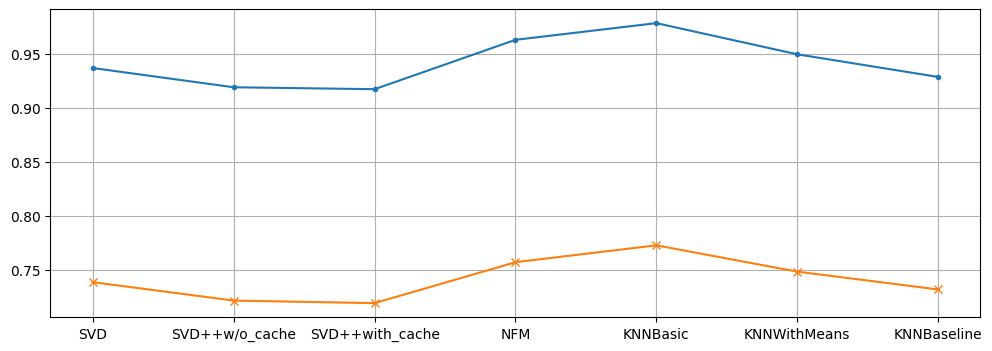

In [123]:
plt.figure(figsize=(12,4))
plt.plot(df.loc['RMSE_mean'], marker='.')
plt.plot(df.loc['MAE_mean'], marker='x')

plt.grid()
plt.show()

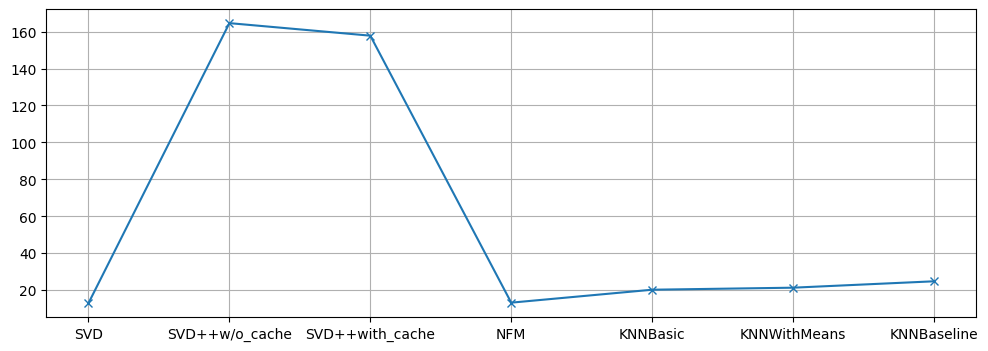

In [125]:
plt.figure(figsize=(12,4))
plt.plot(df.loc['total_time'], marker='x')
plt.grid()
plt.show()

Як видно з графіків найкращі показники RMSE and MAE має алгоритм SVD++ (з кешем та без). Водначас цей алгоритм є одним з найзатратрішним за часом виконнання.
З точки зору критерія якості/швидкості розрахунків то виділяються SVD and KNNBaseline